# Overfitting-Underfitting

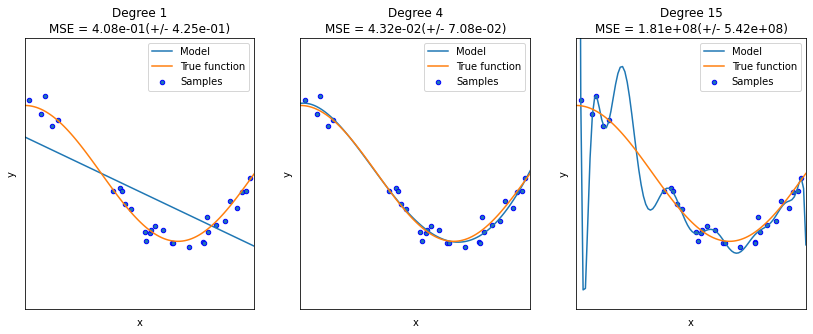

In [ ]:
#Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D 
from keras.layers import Dense, Dropout, Activation, Flatten  

from keras.utils import np_utils

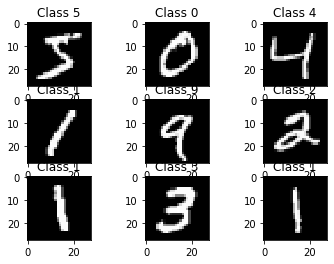

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [ ]:
def get_model_tiny():
  model = Sequential()

  model.add(Convolution2D(1, (3, 3), activation='relu', input_shape=(28,28,1))) 
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def get_model_small():
  model = Sequential()

  model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1))) 
  model.add(Convolution2D(8, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 

def get_model_large():
  model = Sequential()

  model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(28,28,1))) 
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model    

def train_model(model, epochs=10, batch_size=256):
  history = model.fit(
    X_train, 
    Y_train, 
    validation_split=0.3,
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1
  )
  return history

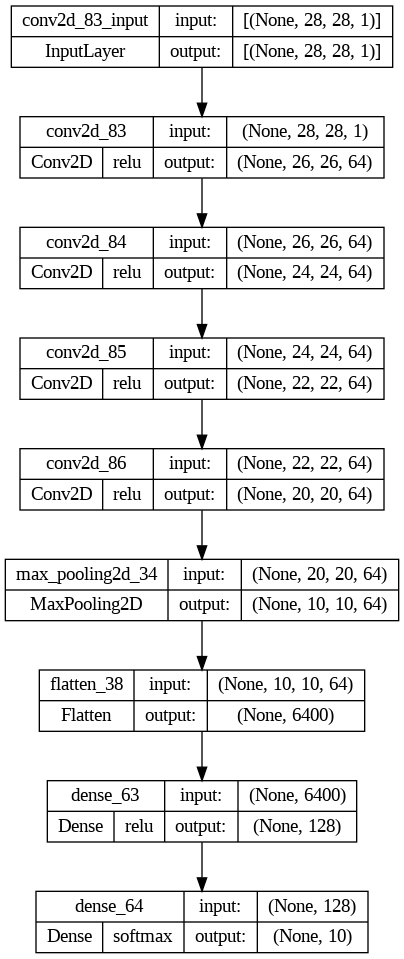

In [ ]:
keras.utils.plot_model(get_model_large(), show_layer_activations=True, show_shapes=True)

Epoch 1/10
165/165 [==============================] - 2s 8ms/step - loss: 16.3222 - accuracy: 0.6855 - val_loss: 5.5214 - val_accuracy: 0.8027
Epoch 2/10
165/165 [==============================] - 1s 7ms/step - loss: 4.1675 - accuracy: 0.8191 - val_loss: 3.2412 - val_accuracy: 0.8319
Epoch 3/10
165/165 [==============================] - 1s 5ms/step - loss: 2.6545 - accuracy: 0.8330 - val_loss: 2.2635 - val_accuracy: 0.8339
Epoch 4/10
165/165 [==============================] - 1s 5ms/step - loss: 1.8888 - accuracy: 0.8368 - val_loss: 1.7196 - val_accuracy: 0.8409
Epoch 5/10
165/165 [==============================] - 1s 5ms/step - loss: 1.4060 - accuracy: 0.8415 - val_loss: 1.3120 - val_accuracy: 0.8412
Epoch 6/10
165/165 [==============================] - 1s 5ms/step - loss: 1.0964 - accuracy: 0.8442 - val_loss: 1.0485 - val_accuracy: 0.8462
Epoch 7/10
165/165 [==============================] - 1s 5ms/step - loss: 0.8631 - accuracy: 0.8498 - val_loss: 0.8561 - val_accuracy: 0.8493
Epoch

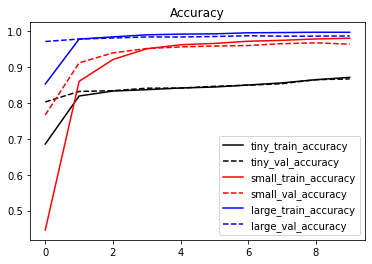

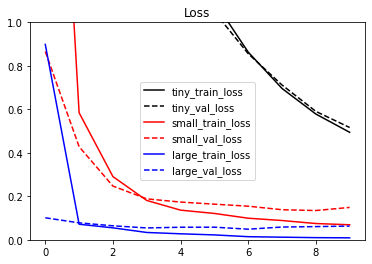

In [ ]:
histories = {
    "tiny": train_model(get_model_tiny()),
    "small": train_model(get_model_small()),
    "large": train_model(get_model_large()),
}


colors = ['black', 'red', 'blue', 'green']
legend = []
plt.title("Accuracy")
for i, key in enumerate(histories):
  history = histories[key]
  plt.plot(history.history["accuracy"], c=colors[i])
  plt.plot(history.history["val_accuracy"], c=colors[i], linestyle='dashed')
  legend.append(f"{key}_train_accuracy")
  legend.append(f"{key}_val_accuracy")

plt.legend(legend)
plt.show()

legend = []
plt.title("Loss")
for i, key in enumerate(histories):
  history = histories[key]
  plt.plot(history.history["loss"], c=colors[i])
  plt.plot(history.history["val_loss"], c=colors[i], linestyle='dashed')
  legend.append(f"{key}_train_loss")
  legend.append(f"{key}_val_loss")
  plt.ylim([0, 1])

plt.legend(legend)
plt.show()